**Fase 3: Visualizando los datos.**

El objetivo de esta fase será proporcionar a **ABC Corporation** un informe detallado del contexto general de la empresa utilizando visualizaciones en Python. Este informe permitirá una comprensión más profunda de la situación actual y servirá como base para la toma de decisiones informadas.

Deberás generar **un informe completo que incluirá las visualizaciones junto con análisis descriptivos (se presentará el día de la demo)**. Las visualizaciones ayudarán a resaltar **tendencias, áreas de mejora y fortalezas dentro de la empresa**.

In [47]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv("files/raw_data_limpio.csv") 

In [49]:
# Paleta rosa (Material Design Pink)
paleta_rosas = [
    "#880E4F",  # rosa muy oscuro
    "#AD1457",
    "#C2185B",
    "#D81B60",
    "#E91E63",  # rosa principal
    "#F06292",
    "#F48FB1",
    "#F8BBD0",
    "#FCE4EC"   # rosa muy claro
]


In [50]:
from matplotlib.colors import LinearSegmentedColormap
cmap_rosas = LinearSegmentedColormap.from_list("rosas", paleta_rosas)

In [51]:
sns.set_theme(style="whitegrid", palette=paleta_rosas)

In [7]:
df.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,non-travel,2015.72,research & development,6,3,unknown,1,1,m,251.96500,3,5,research director,3,unknown,16280.830000,42330.17,7,no,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,1972,195370.00,yes
1,52,no,non-travel,2063.39,unknown,1,4,life sciences,2,3,m,257.92375,2,5,manager,3,unknown,16665.833333,43331.17,0,unknown,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,1971,199990.00,yes
2,42,no,travel_rarely,1984.25,unknown,4,2,technical degree,3,3,m,248.03125,3,5,manager,4,married,16026.666667,41669.33,1,no,11,3.0,4,full time,0,22.0,3,3.0,22,11,15,1981,192320.00,yes
3,47,no,travel_rarely,1771.40,research & development,2,4,medical,4,1,f,221.42500,3,4,research director,3,married,14307.500000,37199.50,3,unknown,19,3.0,2,full time,2,NaN,2,3.0,20,5,6,1976,171690.00,no
4,46,no,non-travel,1582.77,sales,3,3,technical degree,5,1,f,197.84625,4,4,sales executive,1,divorced,12783.920000,33238.20,2,no,12,3.0,4,full time,1,NaN,5,3.0,19,2,8,1977,153407.04,no


### 1. Distribución de Atrición ('attrition')

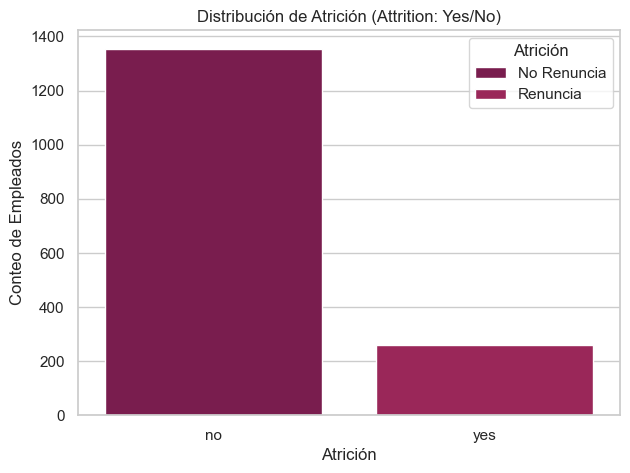

In [8]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='attrition', hue='attrition')

plt.title('Distribución de Atrición (Attrition: Yes/No)')
plt.xlabel('Atrición')
plt.ylabel('Conteo de Empleados')
plt.legend(title='Atrición', labels=['No Renuncia', 'Renuncia'])

plt.show()

In [9]:
valores_unicos_job_role = df[df['department'] == 'unknown']['jobrole'].unique()

In [10]:
valores_unicos_job_role

array(['manager'], dtype=object)

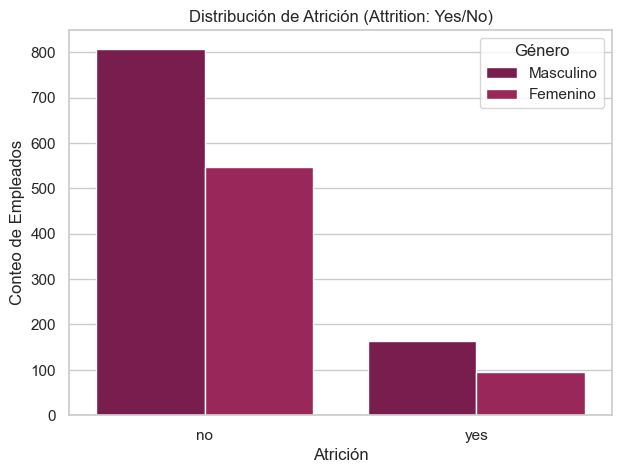

In [11]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='attrition', hue='gender')

plt.title('Distribución de Atrición (Attrition: Yes/No)')
plt.xlabel('Atrición')
plt.ylabel('Conteo de Empleados')
plt.legend(title='Género', labels=['Masculino', 'Femenino'])

plt.show()

Este gráfico muestra la proporción entre los empleados que **permanecen en la empresa y los que deciden irse**.

Se aprecia que la mayoría de los trabajadores optan por **no dejar la organización**, ya que la barra correspondiente a 'sí' es notablemente más baja. Esto sugiere que, pese a existir cierta rotación, la tendencia principal es la **permanencia del personal**. 

### 2. Atrición por departamento: 

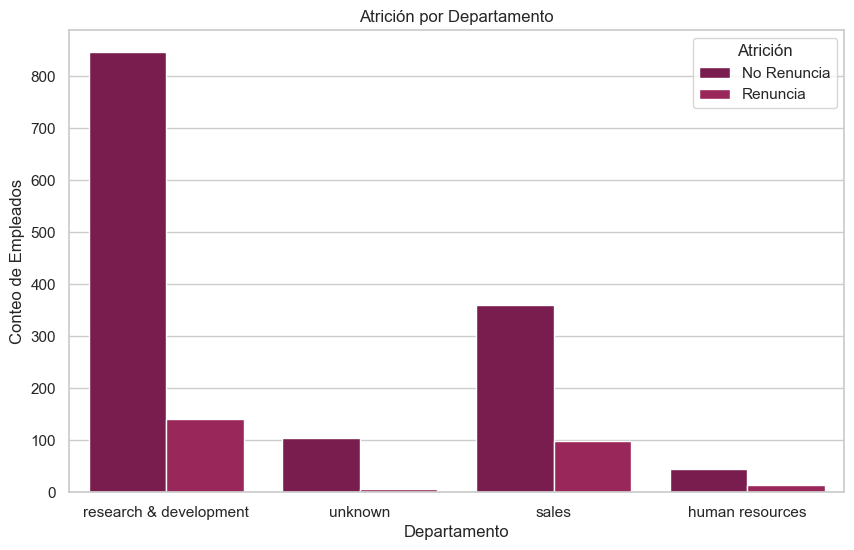

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='department', hue='attrition')

plt.title('Atrición por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Conteo de Empleados')
plt.legend(title='Atrición', labels=['No Renuncia', 'Renuncia'])
plt.show()

In [13]:
df['department'].value_counts()

department
research & development    987
sales                     459
unknown                   111
human resources            57
Name: count, dtype: int64

El departamento con mayor cantidad de empleados, y a la vez, con una atrición significativa es 'Research & Development'. Y aunque 'Sales' tiene menos empleados, la proporción de renuncias es más alta. Por último 'Human Resources' que, aunque es un departamento pequeño, tiene una tasa de atrición preocupante en relación con su tamaño. 

____

### 3. Tasa de Rotación por Rol de Trabajo: 

In [14]:
# Cálculo de la tasa de rotación por Jobrole:
# Agrupar por Jobrole y contar las proporciones de Attrition
proporcion_rotacion_rol = df.groupby('jobrole')['attrition'].value_counts(normalize=True).mul(100)

# Convertir la Serie a un DataFrame
df_attrition_rol = proporcion_rotacion_rol.rename('percent').reset_index()

# Filtrar solo por la rotación ('yes')
df_attrition_rol = df_attrition_rol[df_attrition_rol['attrition'] == 'yes']

# 2. Ordenar los datos
# Ordenar el DataFrame para que el rol con MAYOR rotación aparezca primero.
df_attrition_rol = df_attrition_rol.sort_values(by='percent', ascending=False)

In [15]:
df_attrition_rol.head(2)

,jobrole,attrition,percent
17,sales representative,yes,37.777778
5,laboratory technician,yes,23.741007


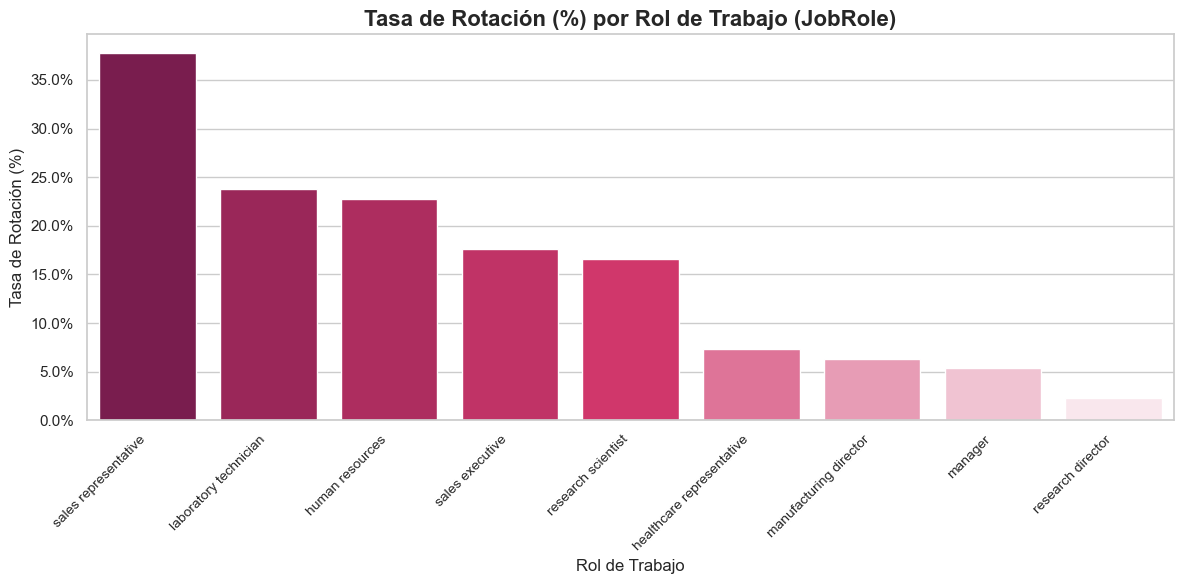

In [16]:
paleta_rosas = [
 '#880E4F', '#AD1457', '#C2185B', '#D81B60', '#E91E63', 
    '#F06292', '#F48FB1', '#F8BBD0', '#FCE4EC'
]

# Aseguramos que la paleta tenga la longitud correcta
num_roles = len(df_attrition_rol['jobrole'].unique())
paleta_final = paleta_rosas[:num_roles] 

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6)) 

# Creación del Barplot con las correcciones para evitar el FutureWarning
sns.barplot(
    x='jobrole',
    y='percent',
    data=df_attrition_rol,
    # 1. CORRECCIÓN CLAVE: Usar 'jobrole' para colorear
    hue='jobrole', 
    palette=paleta_final,
    # 2. CORRECCIÓN CLAVE: Desactivar la leyenda duplicada
    legend=False 
)

plt.title('Tasa de Rotación (%) por Rol de Trabajo (JobRole)', fontsize=16, weight='bold')
plt.xlabel('Rol de Trabajo', fontsize=12)
plt.ylabel('Tasa de Rotación (%)', fontsize=12)

# Ajustar las etiquetas del eje X para que sean legibles
plt.xticks(rotation=45, ha='right', fontsize=10) 

# Formatear el eje Y para mostrar el porcentaje
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}%'))

plt.tight_layout()
plt.show()

In [17]:
# cuanta gente que se ha ido tenia manager hombre y manager mujer? 
# cuantas personas trabajan desde casa? 

___

### 4. Rotación en empleados con y sin trabajo remoto:

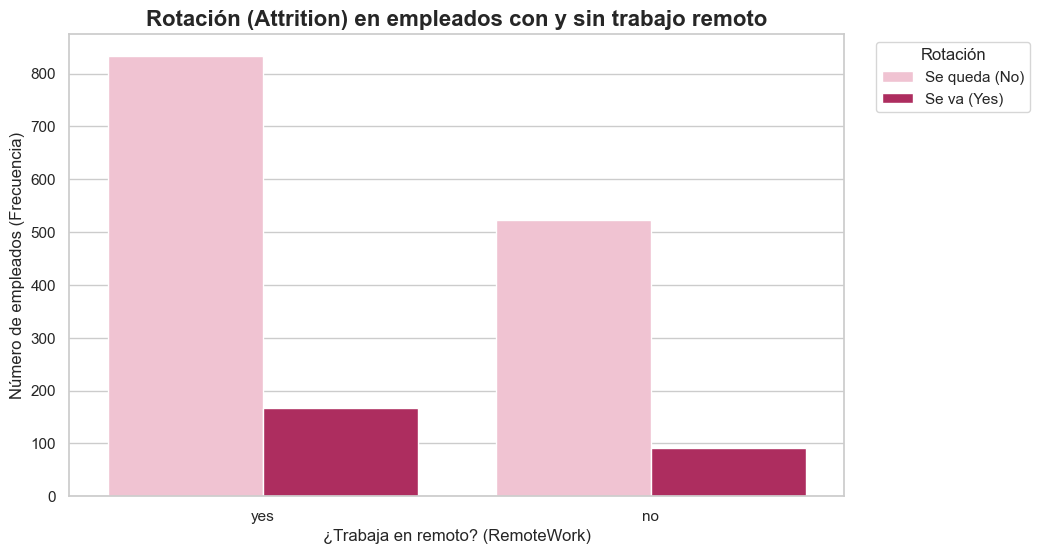

In [18]:
PALETA_REMOTE = {
    'yes': '#C2185B', # Rosa oscuro (para Attrition = 'Yes')
    'no': '#F8BBD0'   # Rosa claro (para Attrition = 'No')
}

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(
    x='remotework',
    hue='attrition',
    data=df,
    palette=PALETA_REMOTE
)

plt.title('Rotación (Attrition) en empleados con y sin trabajo remoto', fontsize=16, weight='bold')
plt.xlabel('¿Trabaja en remoto? (RemoteWork)', fontsize=12)
plt.ylabel('Número de empleados (Frecuencia)', fontsize=12)

plt.legend(title='Rotación', labels=['Se queda (No)', 'Se va (Yes)'], loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

___

### 5. Atrición por Antigüedad en la Empresa:

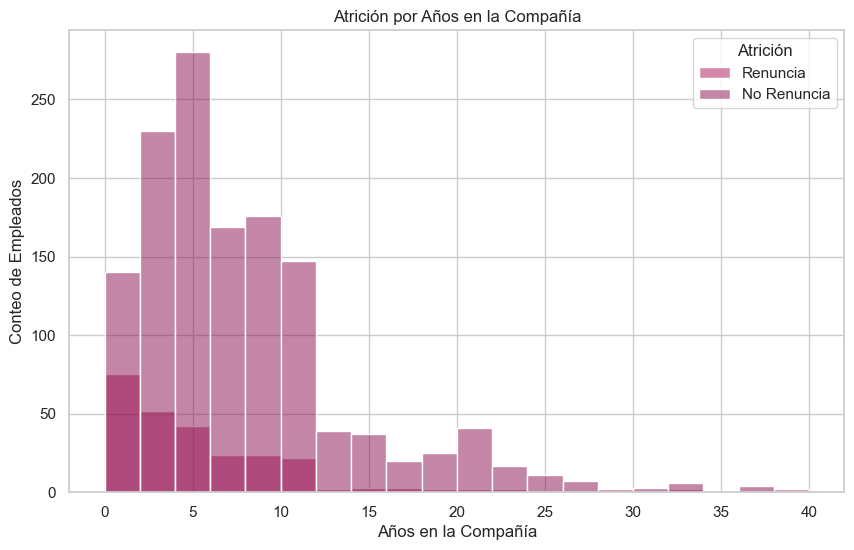

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='yearsatcompany', hue='attrition', bins=20)

plt.title('Atrición por Años en la Compañía')
plt.xlabel('Años en la Compañía')
plt.ylabel('Conteo de Empleados')
plt.legend(title='Atrición', labels=['Renuncia', 'No Renuncia'])
plt.show()

In [20]:
# en que departamento trabajaban las personas que se quedan alrededor de 40 años en la empresa? 

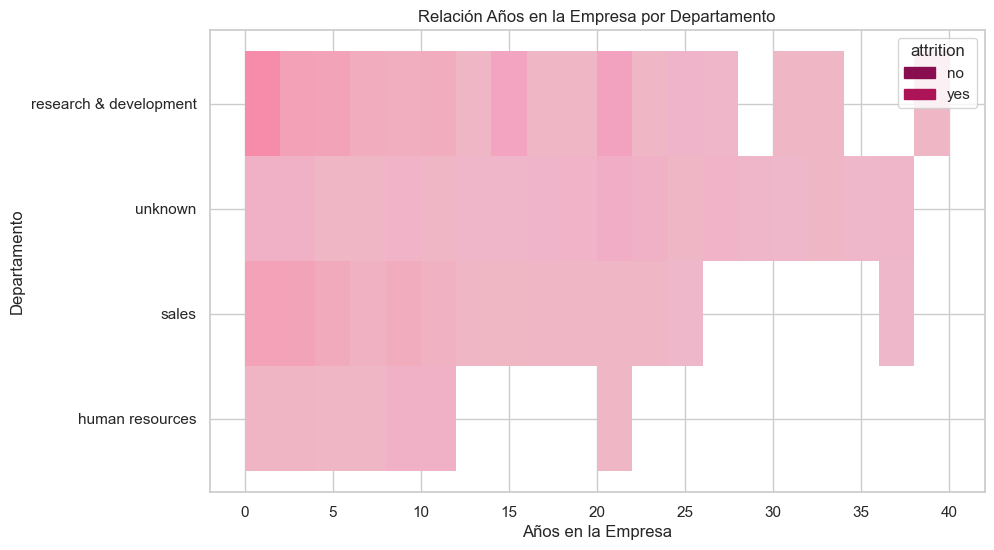

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='yearsatcompany', y='department', hue='attrition', bins=20)

plt.title('Relación Años en la Empresa por Departamento')
plt.xlabel('Años en la Empresa')
plt.ylabel('Departamento')
plt.show()

Conlusiones principales: 

- La mayoría de los empleados permanecen en la empresa, lo que indica **estabilidad laboral**. Recomendación: Mantener las políticas que favorecen la retención, pero sin descuidar los focos de atrición. 

- 'Research & Development' es el departamento con **más empleados y más renuncias en términos absolutos**. Recomendación: Investigar las causas. ¿Falta de crecimiento, salarios, carga laboral o falta de reconocimiento?

- 'Sales' tiene una **alta proporción de renuncias** (casi 1 de cada 4 empreados se va). Recomendación: Analizar condiciones laborales. ¿Comisiones, presión, falta de equilibrio vida-trabajo?

- 'Human Resources' aunque es pequeño, su **tasa de atrición es preocupante**. Recomendación: Priorizar la retención en este departamento. ¿Liderazgo, clima laboral, oportunidades de desarrollo? 

- Los datos 'Unknown' representan información mal clasificada o irrelevante. Recomendación: Revisar y corregir la fuente de datos para evitar sesgos en el análisis. 

Gráfico de frecuencia de rotación por departamento guardado como attrition_frequency_by_department.png


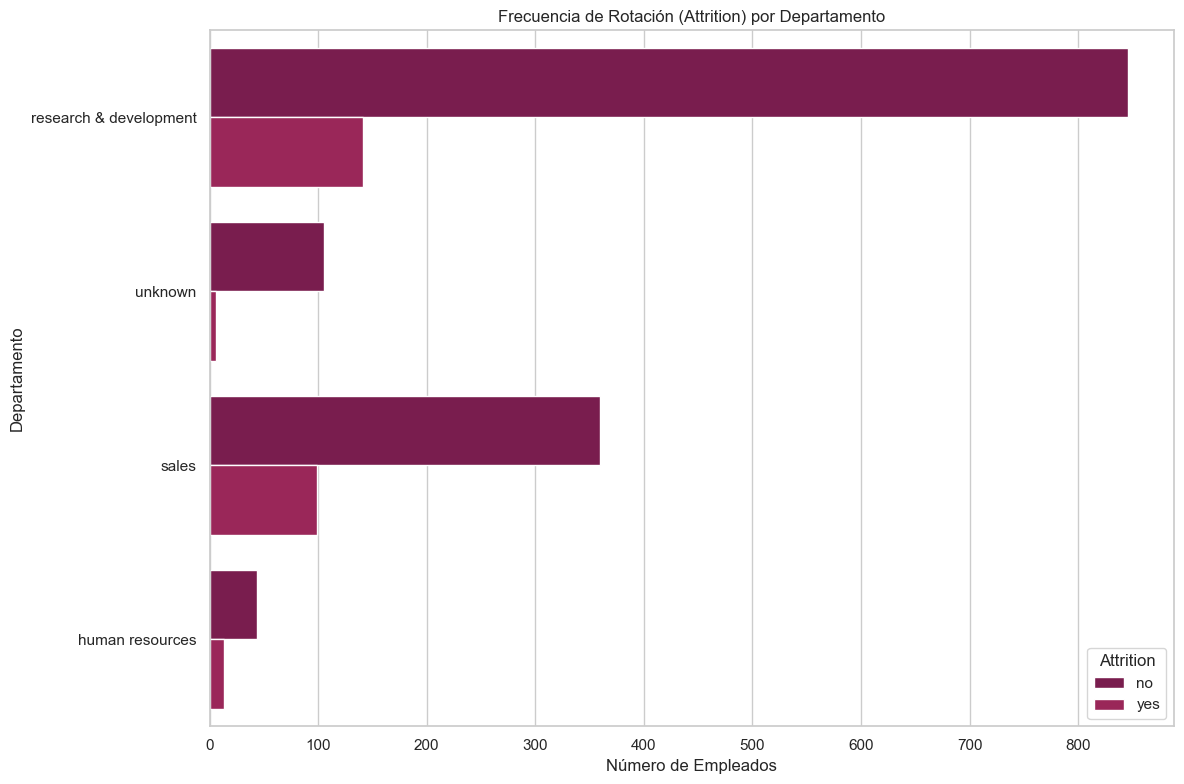

In [55]:
plt.figure(figsize=(12, 8))
sns.countplot(y='department', hue='attrition', data=df)
plt.title('Frecuencia de Rotación (Attrition) por Departamento')
plt.xlabel('Número de Empleados')
plt.ylabel('Departamento')
plt.legend(title='Attrition')

# Ajusta el layout para que no se corten las etiquetas
plt.tight_layout()
plt.savefig('attrition_frequency_by_department.png')
print('Gráfico de frecuencia de rotación por departamento guardado como attrition_frequency_by_department.png')

Gráfico de porcentaje de rotación guardado como attrition_percentage_by_department.png


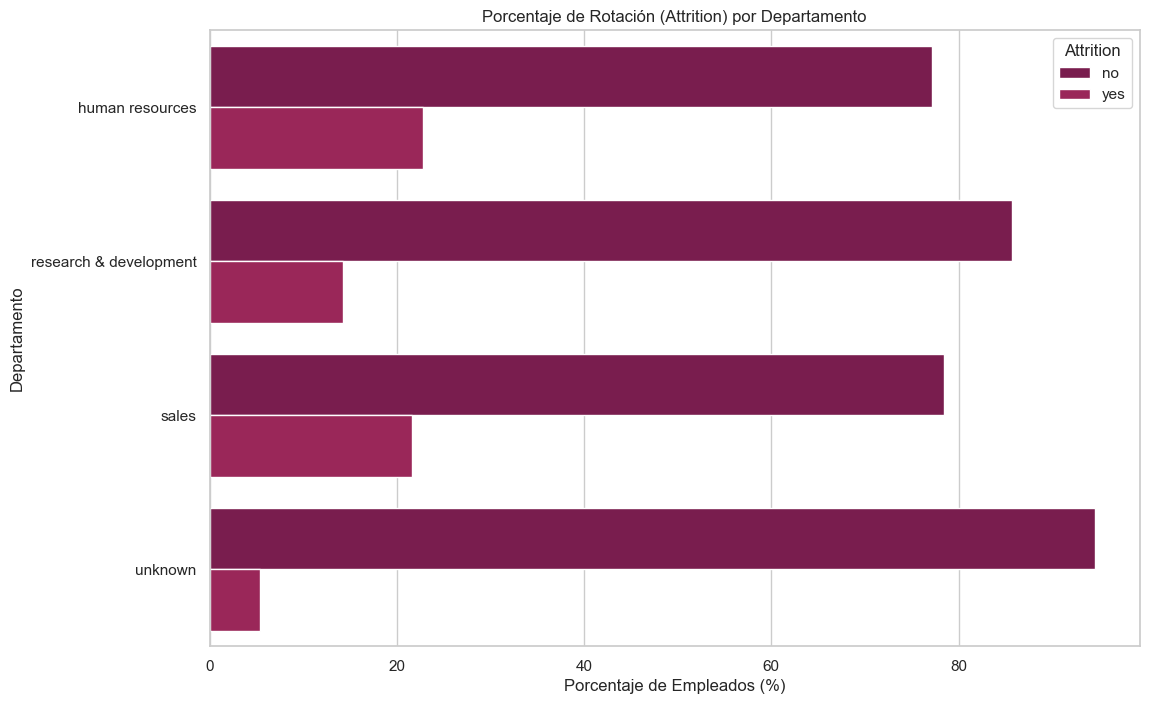

In [57]:
# Calcular el porcentaje de rotación por departamento9 
# 1. Agrupar por departamento y contar los valores de 'attrition'
# 2. Usar normalize=True para obtener la proporción
# 3. Multiplicar por 100 y resetear el índice para convertirlo en un DataFrame
attrition_perc = df.groupby('department')['attrition'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Crear la figura para el gráfico
plt.figure(figsize=(12, 8))

# Generar el gráfico de barras usando los datos calculados
sns.barplot(x='percentage', y='department', hue='attrition', data=attrition_perc)

# Configurar título y etiquetas
plt.title('Porcentaje de Rotación (Attrition) por Departamento')
plt.xlabel('Porcentaje de Empleados (%)')
plt.ylabel('Departamento')
plt.legend(title='Attrition')

# Guardar el gráfico
plt.savefig('attrition_percentage_by_department.png')

print("Gráfico de porcentaje de rotación guardado como attrition_percentage_by_department.png")

_____

### 6. Ingreso Mensual ('monthlyincome') por Departamento ('department')

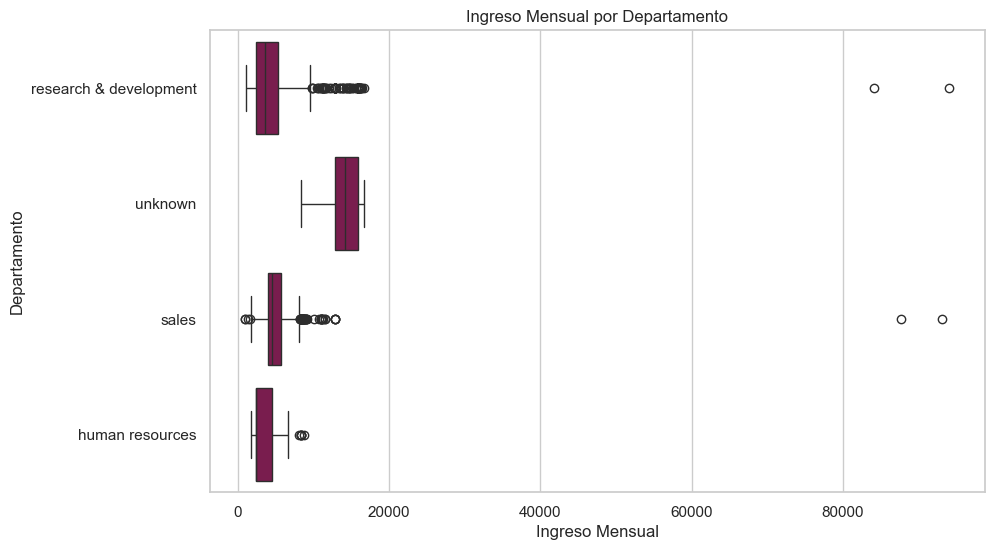

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='monthlyincome', y='department')

plt.title('Ingreso Mensual por Departamento')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Departamento')
plt.show()

Este diagrama de cajas compara la distribución salarial en los principales departamentos. 

Se puede ver que los trabajadores en los departamentos de 'Research & Development y Sales' tienen una distribución de ingresos bastante amplia, con muchos empleados en rangos salariales medios. 

Conclusiones: 

- Desigualdad salarial en 'Research & Development' y 'Sales'

- La mayoría de los empleados de tienen ingresos bajos, pero unos pocos alcanzan ingresos muy altos (hasta ~100,000). Esto sugiere un sistema de compensación basado en comisiones o bonos, lo que podría generar insatisfacción en el equipo si no todos tienen las mismas oportunidades.

- Research & Development tiene los ingresos promedio más altos, pero también una gran variabilidad. Esto podría reflejar diferencias entre roles (ej: junior vs. senior) o inequidades en la compensación.

- Human Resources tiene los ingresos más bajos y menos dispersos, lo que podría explicar su alta tasa de atrición (como vimos en la gráfica anterior). Si los salarios no son competitivos, los empleados pueden buscar oportunidades en otras empresas.

- Outliers:

        Los valores atípicos (outliers) en Sales y R&D podrían corresponder a puestos directivos o empleados con bonos excepcionales. Es importante analizar si estos casos son justos o generan descontento en el equipo.


In [23]:
# Supongamos que 'df' es tu DataFrame con las columnas 'monthlyincome' y 'department'

# Función para eliminar outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

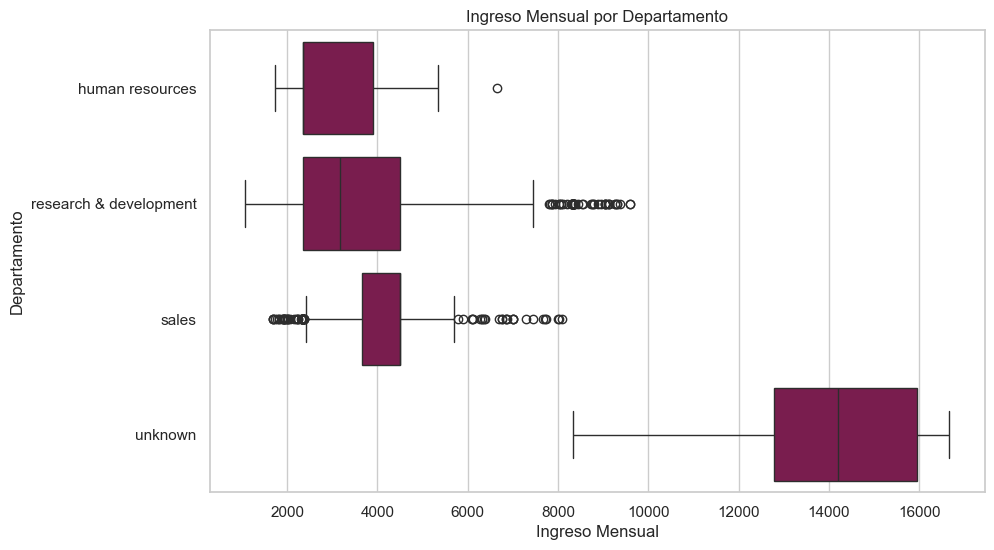

In [24]:
# Aplicar la función a cada departamento
df_sin_outliers = df.groupby('department').apply(
    lambda x: remove_outliers(x, 'monthlyincome')
).reset_index(drop=True)

# Graficar sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sin_outliers, x='monthlyincome', y='department')
plt.title('Ingreso Mensual por Departamento')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Departamento')
plt.show()

Gráfico de violín guardado como income_department_attrition_violin.png


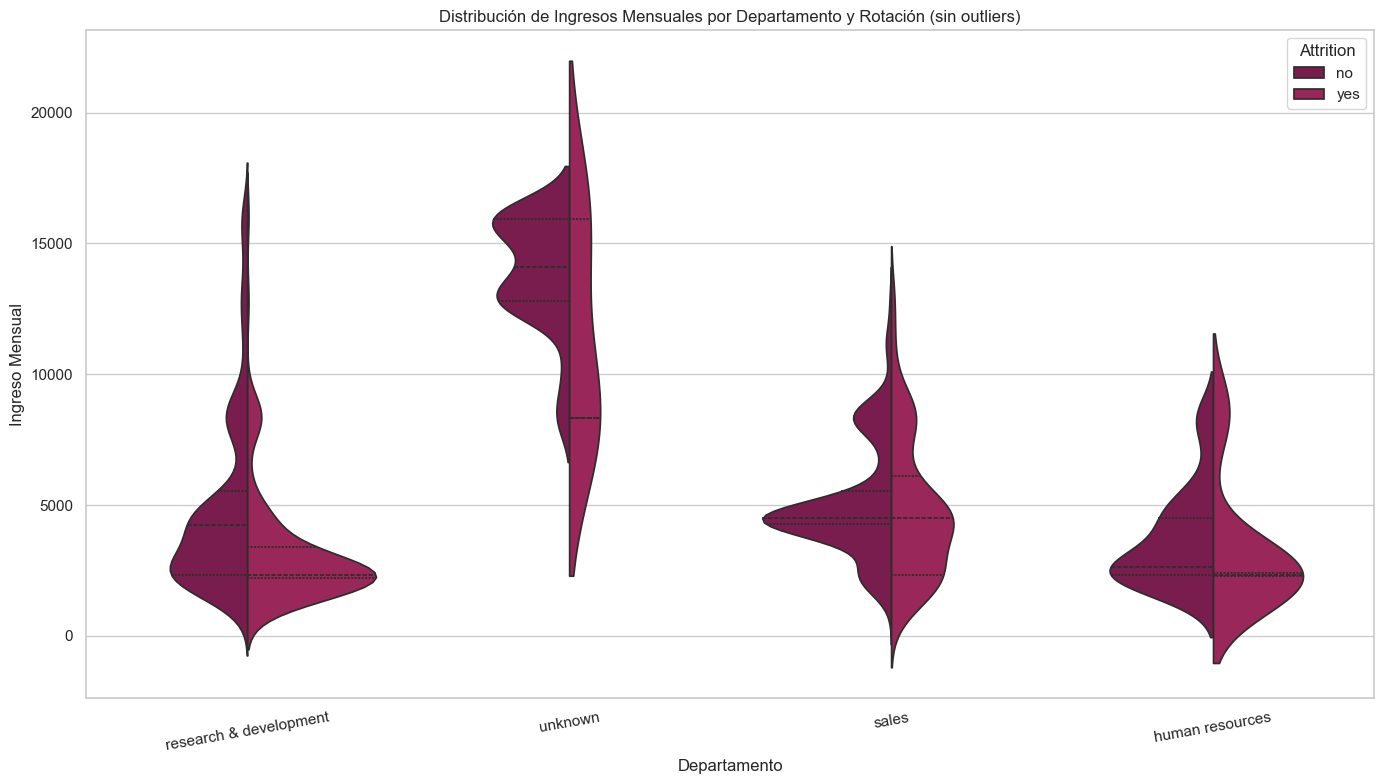

In [58]:
# Función para eliminar outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Crear un nuevo DataFrame sin los outliers en 'monthlyincome'
df_no_outliers = remove_outliers(df, 'monthlyincome')

# Crear la figura para el gráfico
plt.figure(figsize=(14, 8))

# Generar el gráfico de violín
# split=True divide cada violín para comparar el 'hue' (attrition)
# inner='quartile' muestra las líneas de los cuartiles dentro del violín
sns.violinplot(x='department', y='monthlyincome', hue='attrition', data=df_no_outliers, split=True, inner='quartile')

# Configurar título y etiquetas
plt.title('Distribución de Ingresos Mensuales por Departamento y Rotación (sin outliers)')
plt.xlabel('Departamento')
plt.ylabel('Ingreso Mensual')
plt.legend(title='Attrition')
plt.xticks(rotation=10)
plt.tight_layout()

# Guardar el gráfico
plt.savefig('income_department_attrition_violin.png')

print('Gráfico de violín guardado como income_department_attrition_violin.png')

### 7. Antigüedad en la Empresa ('yearsatcompany')

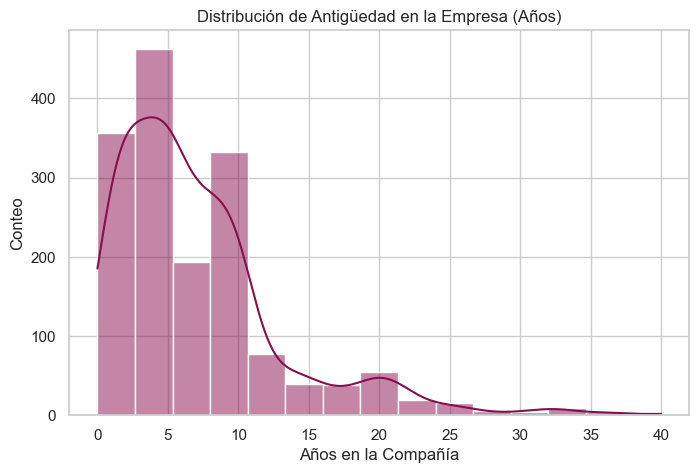

In [25]:
plt.figure(figsize=(8, 5))

sns.histplot(data=df, x='yearsatcompany', bins=15, kde=True)

plt.title('Distribución de Antigüedad en la Empresa (Años)')
plt.xlabel('Años en la Compañía')
plt.ylabel('Conteo')
plt.show()

Este histogrma muestra con qué frecuencia los empleados tienen cierta cantidad de años en la empresa. 

El gráfico muestra que la mayoría de los empleados tienen pocos años en la empresa, con un pico cerca de los 1-5 años. A medida que la antigüedad aumenta, la frecuencia disminuye, lo cual es típico en muchas organizaciones. 

Conclusiones: 

- Empresa joven o en crecimiento:

    La gráfica sugiere que la empresa ha contratado masivamente en los últimos 5 años, pero no retiene a la mayoría de sus empleados más allá de ese período. Esto podría indicar:

- Una cultura de alta rotación: 

    Falta de oportunidades de crecimiento para empleados con experiencia.
    Posible insatisfacción en etapas tempranas (ej: salarios, condiciones laborales).

- Falta de empleados "veteranos":

    La escasez de empleados con 10+ años de antigüedad sugiere que la empresa pierde talento a mediano plazo. Esto puede afectar:

        La transmisión de conocimiento interno.
        La estabilidad de equipos críticos.

- Oportunidad para programas de retención:

    Los empleados con 3-5 años de antigüedad son un grupo clave: si no se sienten valorados, podrían irse. Estrategias como:

        Planes de carrera.
        Bonos por antigüedad.
        Flexibilidad laboral.



____

### 8. Salario vs Antigüedad:

<Axes: xlabel='yearsatcompany', ylabel='monthlyincome'>

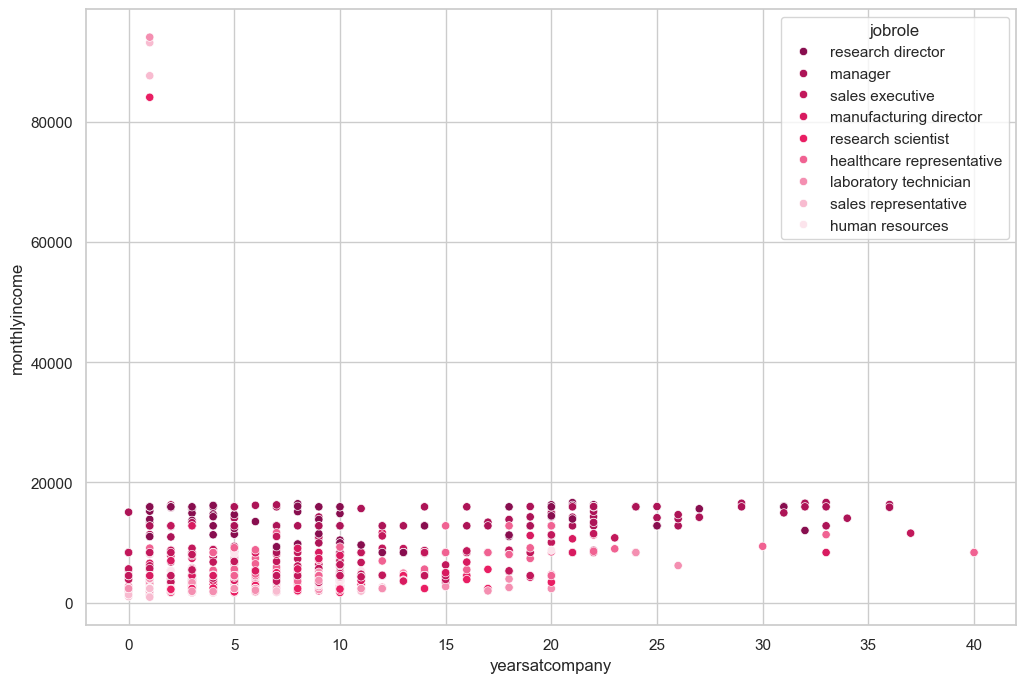

In [27]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='yearsatcompany', y='monthlyincome', hue='jobrole')


In [28]:
df1 = pd.read_csv('files/raw_data.csv', index_col=0)

df1.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1


In [29]:
df[df['monthlyincome'] < 80000]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,non-travel,2015.72,research & development,6,3,unknown,1,1,m,251.96500,3,5,research director,3,unknown,16280.830000,42330.17,7,no,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,1972,195370.00,yes
1,52,no,non-travel,2063.39,unknown,1,4,life sciences,2,3,m,257.92375,2,5,manager,3,unknown,16665.833333,43331.17,0,unknown,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,1971,199990.00,yes
2,42,no,travel_rarely,1984.25,unknown,4,2,technical degree,3,3,m,248.03125,3,5,manager,4,married,16026.666667,41669.33,1,no,11,3.0,4,full time,0,22.0,3,3.0,22,11,15,1981,192320.00,yes
3,47,no,travel_rarely,1771.40,research & development,2,4,medical,4,1,f,221.42500,3,4,research director,3,married,14307.500000,37199.50,3,unknown,19,3.0,2,full time,2,NaN,2,3.0,20,5,6,1976,171690.00,no
4,46,no,non-travel,1582.77,sales,3,3,technical degree,5,1,f,197.84625,4,4,sales executive,1,divorced,12783.920000,33238.20,2,no,12,3.0,4,full time,1,NaN,5,3.0,19,2,8,1977,153407.04,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,1065.28,sales,3,1,life sciences,1610,3,m,133.16000,2,3,sales executive,4,married,8604.170000,22370.83,1,unknown,11,NaN,1,full time,1,NaN,6,3.0,16,3,7,1987,103250.00,no
1610,45,no,non-travel,458.82,research & development,4,2,unknown,1611,3,m,57.35250,3,2,laboratory technician,2,unknown,3705.830000,9635.17,1,unknown,12,3.0,2,part time,0,NaN,5,2.0,9,0,8,1978,44470.00,yes
1611,39,no,travel_rarely,1032.49,sales,13,5,unknown,1612,1,m,129.06125,4,3,sales executive,3,single,8339.320000,21682.23,0,no,18,3.0,4,part time,0,9.0,3,3.0,8,0,7,1984,100071.84,yes
1612,36,no,non-travel,556.26,sales,8,4,technical degree,1613,1,m,69.53250,3,2,sales executive,4,divorced,4492.840000,11681.39,4,no,13,NaN,4,part time,2,12.0,3,3.0,7,0,7,1987,53914.11,yes


___

### 9. Attrition vs Jobsatisfaction:

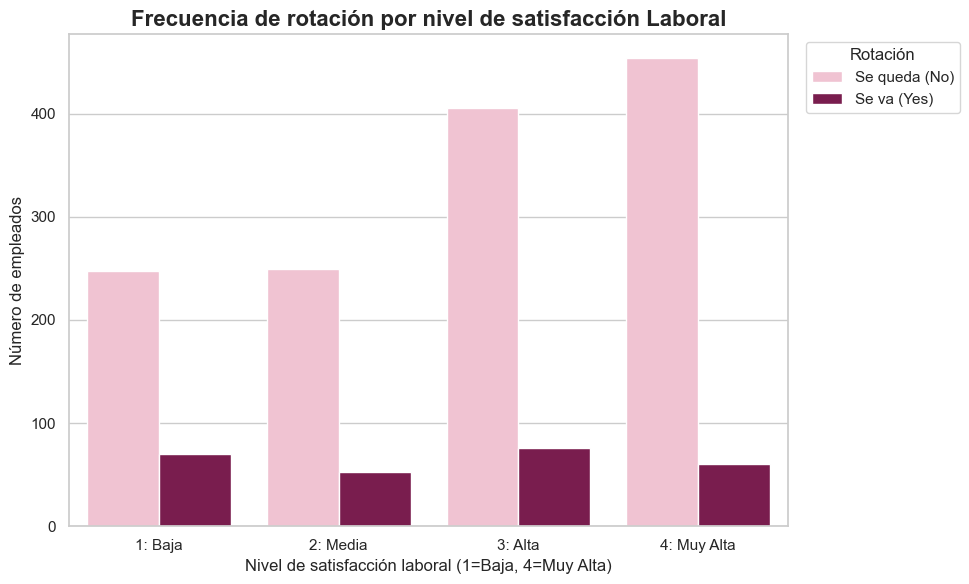

In [30]:
PALETA_SATISFACCION = {
    'yes': '#880E4F',  # Rosa Oscuro: Rotación (Riesgo)
    'no': '#F8BBD0'    # Rosa Claro: Permanencia (Seguridad)
}

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# x: Satisfacción Laboral (categorías 1 a 4)
# hue: Rotación (divide las barras por Attrition)
sns.countplot(
    x='jobsatisfaction',
    hue='attrition',
    data=df,
    palette=PALETA_SATISFACCION
)

plt.title('Frecuencia de rotación por nivel de satisfacción Laboral', fontsize=16, weight='bold')
plt.xlabel('Nivel de satisfacción laboral (1=Baja, 4=Muy Alta)', fontsize=12)
plt.ylabel('Número de empleados', fontsize=12)

# Reemplazamos los números del eje X con etiquetas descriptivas
plt.xticks(ticks=[0, 1, 2, 3], labels=['1: Baja', '2: Media', '3: Alta', '4: Muy Alta'])

# Colocamos la leyenda fuera del gráfico para que no tape las barras
plt.legend(title='Rotación', labels=['Se queda (No)', 'Se va (Yes)'], loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

____

### 10. Ingreso mensual vs rotación

In [31]:
import matplotlib.ticker as ticker

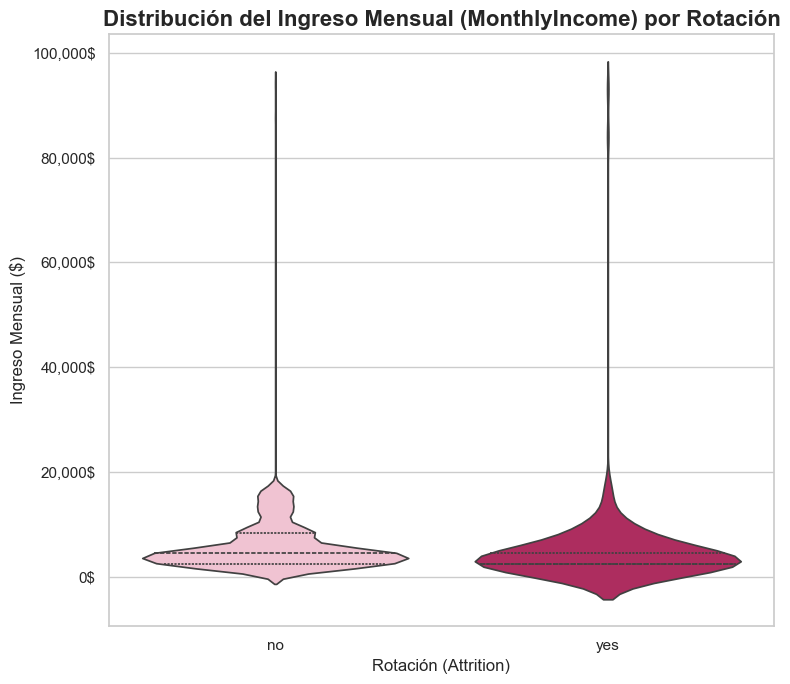

In [32]:
PALETA_INGRESO = {
    'yes': '#C2185B',  # Rosa Oscuro: Rotación (Riesgo)
    'no': '#F8BBD0'    # Rosa Claro: Permanencia (Seguridad)
}

# 2. Configuración del estilo
sns.set_style("whitegrid")
plt.figure(figsize=(8, 7))

# 3. Creación del Violinplot
sns.violinplot(
    x='attrition',
    y='monthlyincome',
    data=df,
    hue='attrition', 
    palette=PALETA_INGRESO,
    legend=False,
    inner='quartile'
)

# 4. Personalización y formato
plt.title('Distribución del Ingreso Mensual (MonthlyIncome) por Rotación', fontsize=16, weight='bold')
plt.xlabel('Rotación (Attrition)', fontsize=12)
plt.ylabel('Ingreso Mensual ($)', fontsize=12)

# 5. Formato del Eje Y Explicado y Corregido:
# plt.gca() = "Get Current Axes" (obtener el área de la gráfica actual)
# .yaxis = Selecciona el eje vertical
# .set_major_formatter() = Asigna la regla de formato
# ticker.StrMethodFormatter('{x:,.0f}$'):
#   - {x: = El valor de la etiqueta del eje
#   - , = Añade una coma como separador de miles
#   - .0f = No muestra decimales
#   - $ = Añade el símbolo de dólar al final
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}$'))

plt.tight_layout()
plt.show()

_____

### 11. Frecuencia de rotación por satisfacción y equilibrio

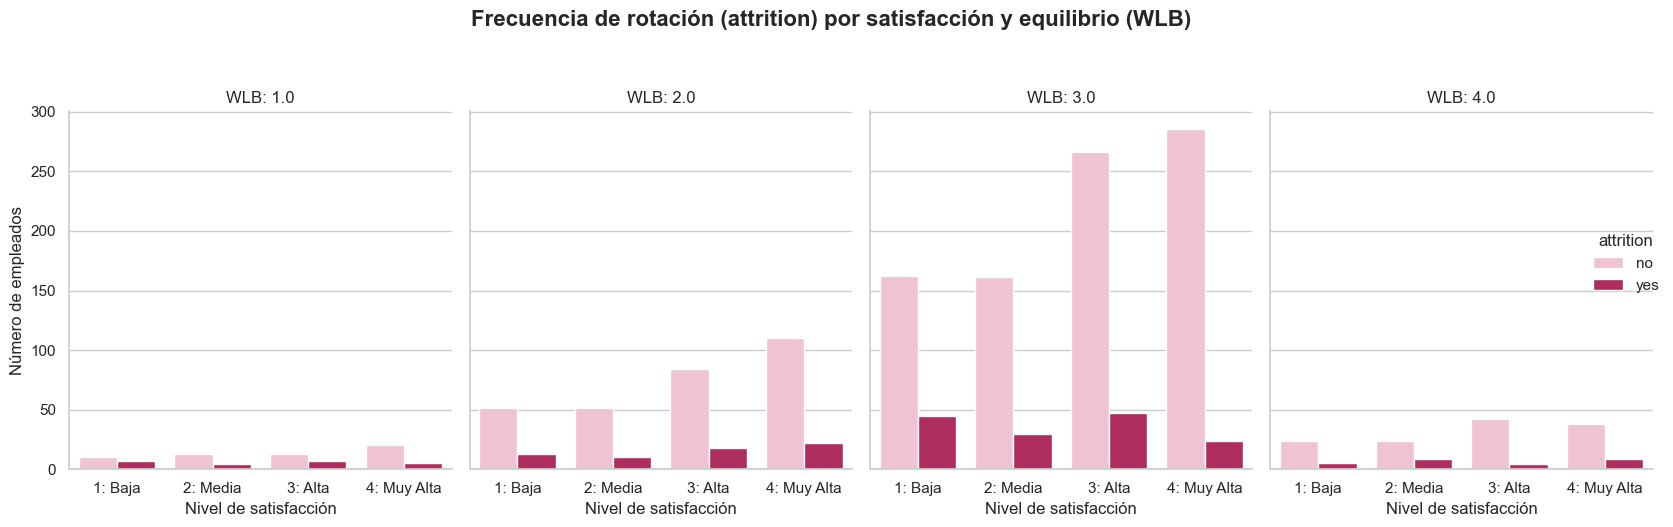

In [ ]:
PALETA_WLB = {
    'yes': '#C2185B',  # Rosa Oscuro: Rotación (Riesgo)
    'no': '#F8BBD0'    # Rosa Claro: Permanencia (Seguridad)
}

g = sns.catplot(
    data=df,
    x='jobsatisfaction', # Eje principal
    hue='attrition',     # Subdivisión de barras (Color)
    col='worklifebalance', # ¡CRUCIAL! Crea una columna de gráficos para cada nivel
    kind='count',        # Tipo de gráfico: Countplot (frecuencia)
    palette=PALETA_WLB,
    height=5,            # Altura de cada gráfico
    aspect=0.8           # Proporción de aspecto (ancho/alto)
)

g.figure.suptitle('Frecuencia de rotación (attrition) por satisfacción y equilibrio (WLB)', 
               fontsize=16, weight='bold', y=1.05) # Título general

g.set_axis_labels("Nivel de satisfacción", "Número de empleados")
g.set_titles("WLB: {col_name}") # Título para cada columna: WLB: 1, WLB: 2, etc.

plt.xticks(ticks=[0, 1, 2, 3], labels=['1: Baja', '2: Media', '3: Alta', '4: Muy Alta'])

plt.tight_layout()
plt.show()

____

### 12. Relación entre Evaluación de Desempeño y Aumento Salarial

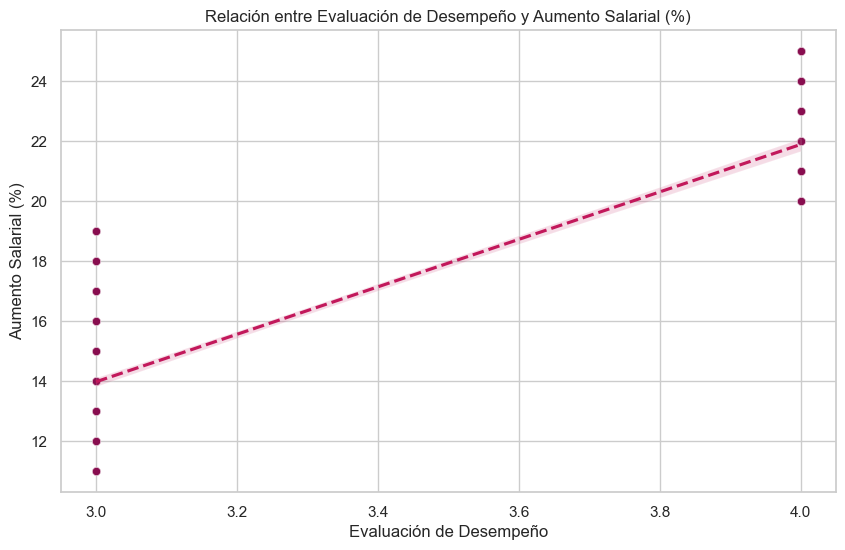

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='performancerating', y='percentsalaryhike', alpha=0.6)
sns.regplot(data=df, x='performancerating', y='percentsalaryhike', scatter=False, color='#C2185B', line_kws={'linestyle':'--'})
plt.title('Relación entre Evaluación de Desempeño y Aumento Salarial (%)')
plt.xlabel('Evaluación de Desempeño')
plt.ylabel('Aumento Salarial (%)')
plt.grid(True)
plt.show()

Gráfico generado como performance_salary_hike.png


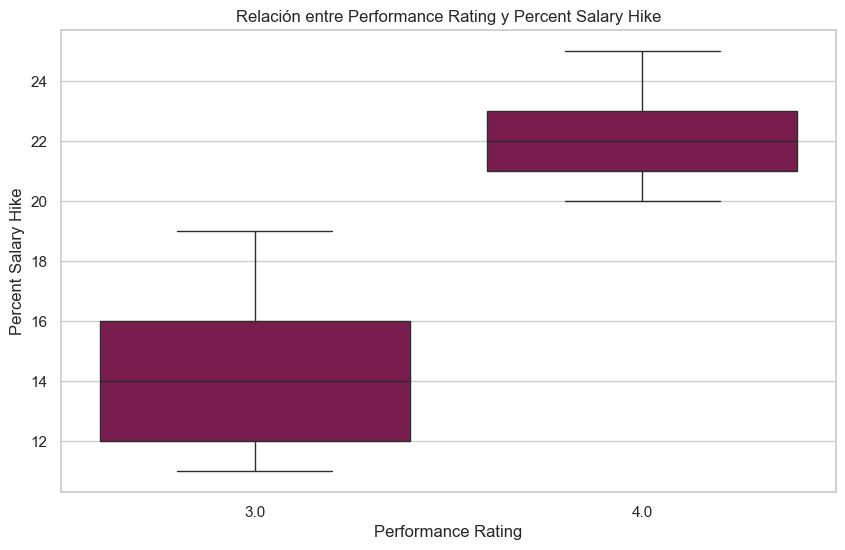

In [54]:
# Crear la figura y el eje para el gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x='performancerating', y='percentsalaryhike', data=df)

 # Añadir título y etiquetas a los ejes
plt.title('Relación entre Performance Rating y Percent Salary Hike')
plt.xlabel('Performance Rating')
plt.ylabel('Percent Salary Hike')
# Guardar el gráfico en un archivo
plt.savefig('performance_salary_hike.png')
# Mostrar el gráfico (opcional, si se ejecuta en un entorno interactivo como Jupyter)
# plt.show()
print('Gráfico generado como performance_salary_hike.png')

Conclusiones: 

- Tendencia positiva clara: La línea de tendencia (roja) sube de izquierda a derecha: a mayor evaluación de desempeño, mayor aumento salarial. La empresa **premia el desempeño con aumentos salariales**, lo que es una buena práctica.
Recomendación: Mantener esta política y comunicarla claramente para motivar a los empleados.

- Correlación moderada: Los puntos no están perfectamente alineados, pero la tendencia es visible. Aunque hay una relación, no es determinista: otros factores pueden influir en el aumento salarial.

- Outliers: Algunos empleados con evaluación baja (ej: 3.0) reciben aumentos altos (ej: 18-20%). Posibles excepciones o errores en la evaluación. Revisar casos individuales para asegurar equidad.

In [35]:
# Promedio de aumento salarial por departamento
promedio_depto = df.groupby('department')['percentsalaryhike'].mean().round(2)
print("\nPromedio de aumento salarial por departamento:\n", promedio_depto)


Promedio de aumento salarial por departamento:
 department
human resources           14.60
research & development    15.24
sales                     15.10
unknown                   15.05
Name: percentsalaryhike, dtype: float64


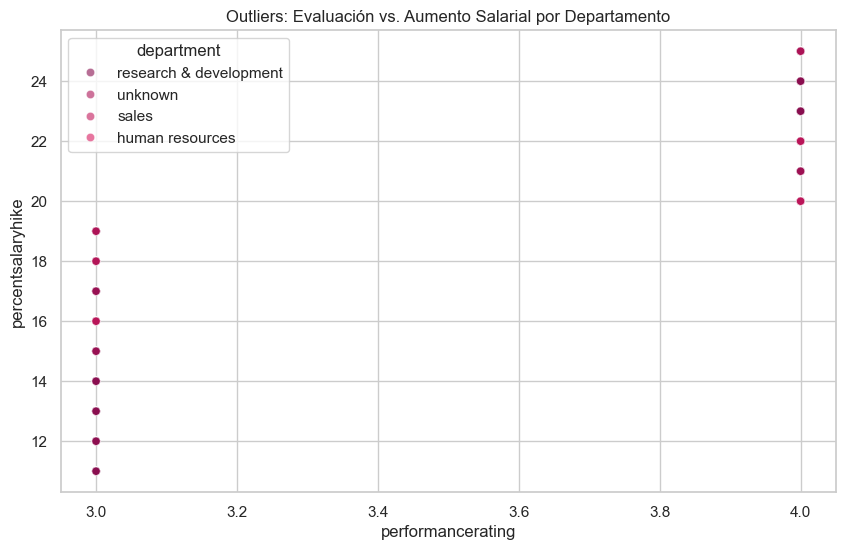

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='performancerating', y='percentsalaryhike', hue='department', alpha=0.6)
plt.title('Outliers: Evaluación vs. Aumento Salarial por Departamento')
plt.grid(True)
plt.show()

Conclusión:

Los outliers reciben aumentos salariales significativamente más altos que el promedio de sus departamentos, especialmente en Human Resources (+9.4%).

Posibles Razones para los Outliers

a. Research & Development

- Roles críticos: Empleados como "research director" o "healthcare representative" pueden tener habilidades difíciles de reemplazar.

- Antigüedad: Muchos tienen 15+ años en la empresa, lo que sugiere ajustes por lealtad o corrección de salarios históricos.

- Retención de talento: La empresa puede estar usando aumentos salariales para evitar que estos empleados se vayan a la competencia.

b. Sales

- Alta atrición: Como vimos en gráficas anteriores, Sales tiene una alta tasa de atrición. Los aumentos altos pueden ser una estrategia para retener talento.

- Comisiones y bonos: Algunos empleados pueden tener aumentos altos debido a logros excepcionales en ventas, aunque su evaluación general sea 3.0.


c. Human Resources

- Rol único: El outlier en HR puede ser un empleado con un rol especializado o experiencia única en la empresa.

- Corrección de salario: Posible ajuste para alinear su salario con el mercado o compensar años de servicio.


d. Unknown

- Clasificación incorrecta: Es posible que estos empleados pertenezcan a otro departamento o estén en transición.


___

### 13. Aumento Salarial por Desempeño y Antigüedad

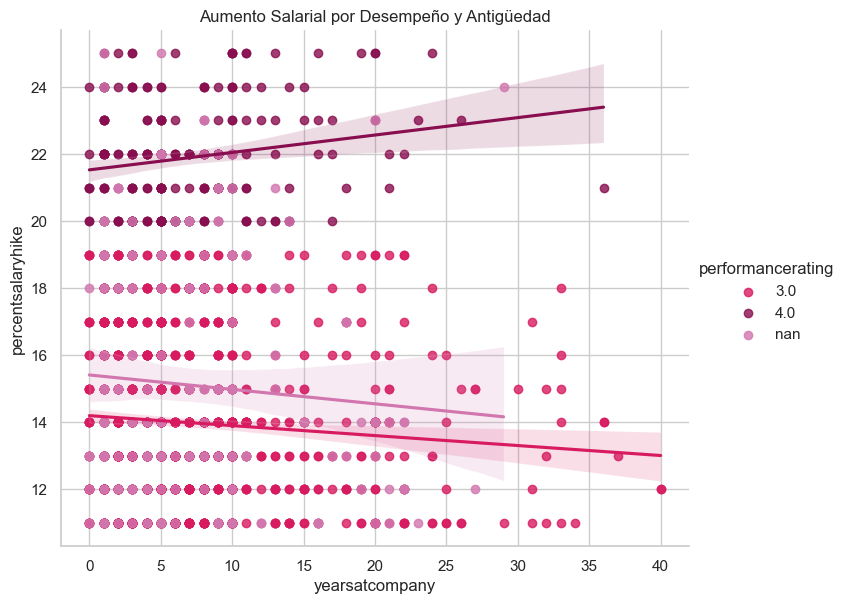

In [66]:
# Definimos una paleta completa para los 4 niveles de desempeño
PALETA_WLB = {
    '4.0': '#880E4F', # Color añadido para el nivel 1
    '3.0': "#D81B60", # Color añadido para el nivel 2
    'nan': "#D176AE", # Tu color original
}
 
# Nos aseguramos de que 'performancerating' sea de tipo object/string si los valores son '1', '2', etc.
# Si la columna es numérica, los keys del diccionario DEBEN ser números (1, 2, 3, 4).
# A continuación se usa la versión más segura (convertir a string para la paleta):
df['performancerating'] = df['performancerating'].astype(str)

sns.lmplot(
    data=df,
    x='yearsatcompany',
    y='percentsalaryhike',
    hue='performancerating',
    height=6,
    aspect=1.2,
    palette=PALETA_WLB # Usamos la paleta completa
)

plt.title('Aumento Salarial por Desempeño y Antigüedad')
plt.show()

Conclusiones: 

- Aumento salarial vs. antigüedad (naranja): La línea de tendencia para performancerating = 4.0 sube ligeramente con los años en la empresa. Los empleados con alto desempeño ven un aumento gradual en su compensación a lo largo del tiempo.

- Aumento salarial vs. antigüedad (azul): La línea de tendencia para performancerating = 3.0 permanece casi plana con los años. Los empleados con desempeño medio no ven un aumento significativo en su salario con la antigüedad.

Esto sugiere que la empresa valora y recompensa el desempeño sobresaliente a lo largo del tiempo.  Los empleados ven que su esfuerzo y desempeño son reconocidos, lo que puede aumentar la retención.

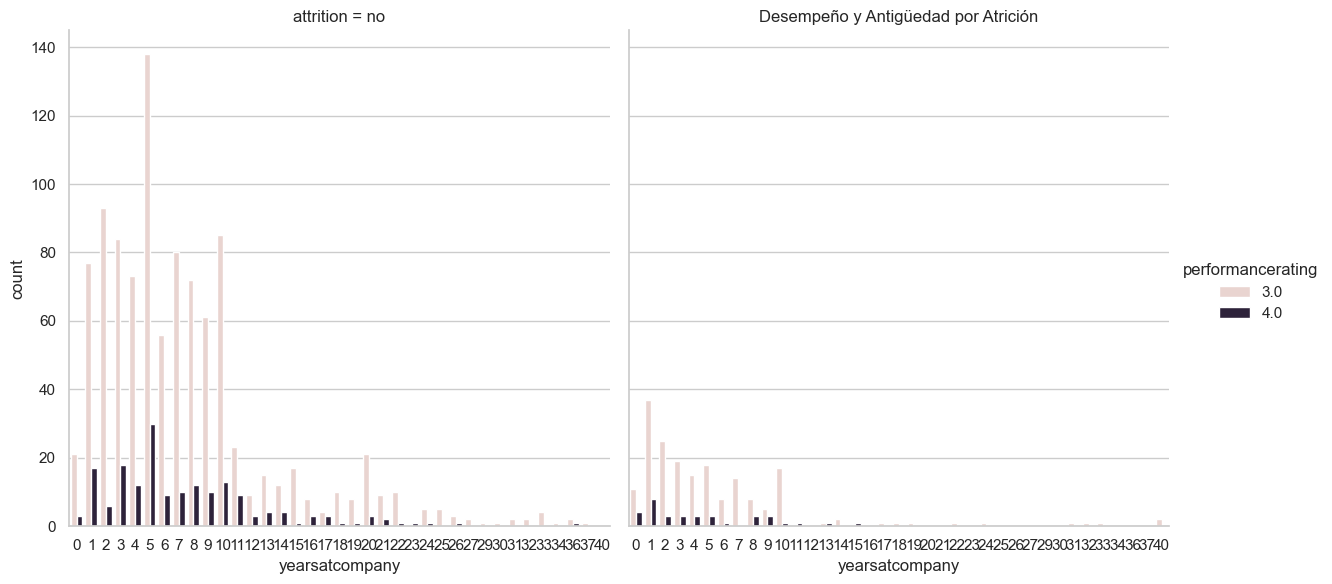

In [38]:
sns.catplot(data=df, x='yearsatcompany', col='attrition', hue='performancerating', kind='count', height=6, aspect=1)
plt.title('Desempeño y Antigüedad por Atrición')
plt.show()

# Columnas: Separadas por atrición (attrition):
# Izquierda: Empleados que no se fueron (attrition = no).
# Derecha: Empleados que sí se fueron (attrition = yes).


Conclusión

La empresa premia el alto desempeño con aumentos salariales más altos y progresivos.

Los empleados con desempeño medio no ven un crecimiento significativo en su salario con la antigüedad, lo que puede afectar su motivación y retención.


Recomendación final:

- Equilibrar la compensación para empleados con desempeño medio pero con alta antigüedad.

- Comunicar claramente los criterios de aumento salarial para mantener la motivación y equidad.
